In [2]:
#Please make sure to import the required libraries to make the script sucess.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [4]:
data = pd.read_csv('diabetes.csv')
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
data.duplicated().sum()

0

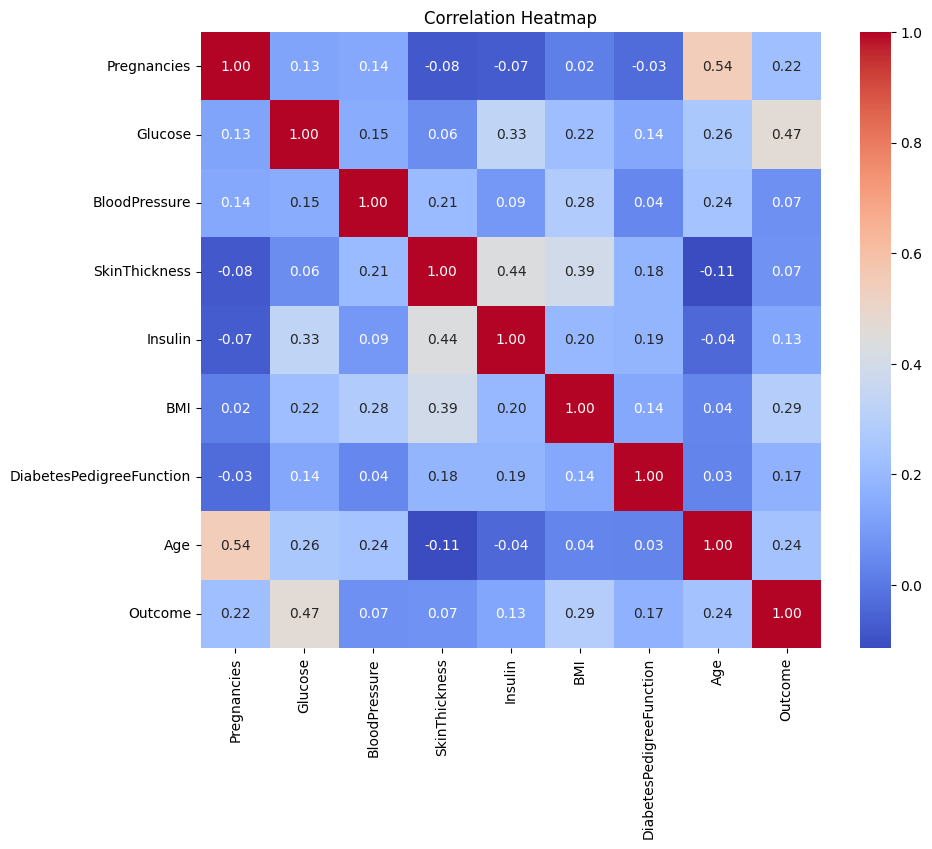

In [10]:
#Let's Plot Correlations using the plt and heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-11-52b221ba2a6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome",data= data, palette="viridis")


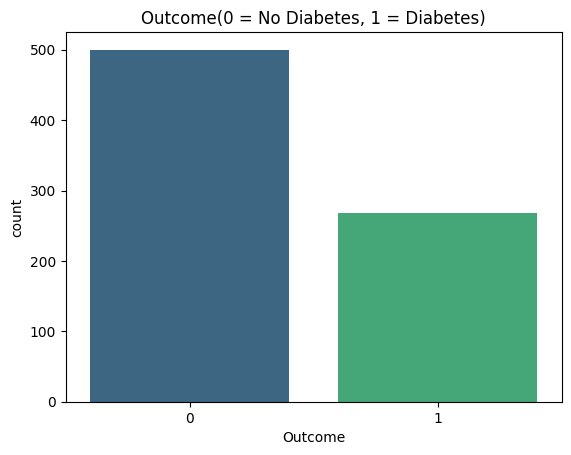

In [11]:
#Using the plot here we have to distribute the outcome.
sns.countplot(x="Outcome",data= data, palette="viridis")
plt.title("Outcome(0 = No Diabetes, 1 = Diabetes)")
plt.show()

In [12]:
#Now let process the data using iloc.
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

In [13]:
#Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train , x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
#Using the train&test let's build the NN.
model = Sequential([
    Dense(16, input_dim=x_train.shape[1],activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Now Let's compile the model using Train.
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [17]:
Epochs = 50
Batch_size = 16
History = model.fit(x_train, y_train, epochs = Epochs, batch_size= Batch_size, validation_split=0.2)

#Evalution based on loss and accuracy.

loss,accuracy = model.evaluate(x_test,y_test)
print(f"\nTest Loss:{loss:.4f}")
print(f"Accuracy:{accuracy:.4f}")

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5587 - loss: 0.6860 - val_accuracy: 0.6098 - val_loss: 0.6566
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7234 - loss: 0.6204 - val_accuracy: 0.6423 - val_loss: 0.6263
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.5797 - val_accuracy: 0.6667 - val_loss: 0.6028
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7520 - loss: 0.5524 - val_accuracy: 0.6667 - val_loss: 0.5810
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7447 - loss: 0.5375 - val_accuracy: 0.6748 - val_loss: 0.5562
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7610 - loss: 0.5054 - val_accuracy: 0.6911 - val_loss: 0.5375
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.5035 - val_accuracy: 0.7236 - val_loss: 0.5233
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.4771 - val_accuracy: 0.7236 - val_loss:

In [18]:
#For extending script we can try to get some Metrics.
y_pred = (model.predict(x_test)> 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154




Classification Matrix:


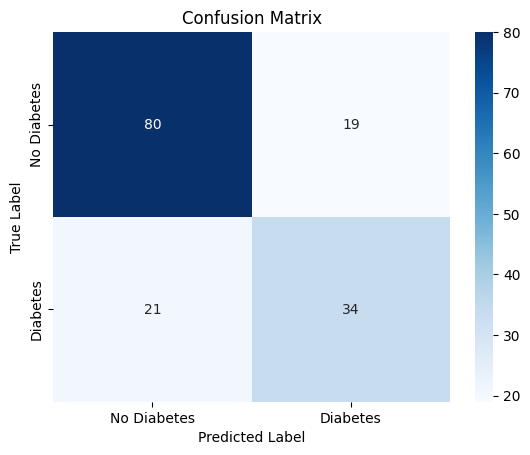

In [19]:
print("\nClassification Matrix:")
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt="d", cmap="Blues", xticklabels=["No Diabetes","Diabetes"], yticklabels=["No Diabetes","Diabetes"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()